In [1]:
using CairoMakie
using SpecialFunctions

# This notebook covers the setup of the filament
include("src/parameters.jl")
include("src/filament_state.jl")

Ri_min (generic function with 1 method)

In [64]:
# So these two
sp = create_simulation_parameters((; Ro=1.1, Ri=1.2, α=1, δ=-0.25));
(b, v) = get_filament_state(sp);

┌ Info: Created simulation parameters
│ Input:
│  Ro=1.1
│  Ri=1.2
│  Ek=nothing
│  α=1
│  λ=0.05
│  δ=-0.25
│ Output:
│  L=1
│  f=1
│  H=0.1
│  δH=-0.025
│  N₀=21.63443389308655
│  Nb=4.999908624861948
│  ℓ=1
│  ν=nothing
└  Lz=0.25
[ Info: Filament state created: Ro=1.100015978773344, Ro_min=0.3451570871470522, Fr₀=0.05084560955971501, Frb=0.22000721639262283, Ri_min=1.200149413937717


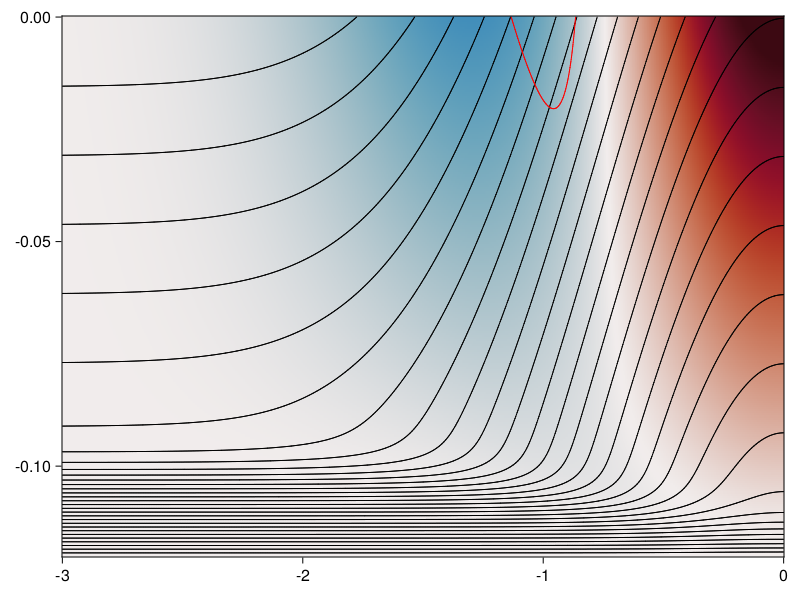

In [65]:
xs = range(-3sp.L, 0, 1024)
zs = range(-1.2sp.H, 0, 256)

fig = Figure()
ax = Axis(fig[1, 1])
@inline ∂v∂x(x, z) =  (v(x+5e-4, z) - v(x-5e-4, z)) / 1e-3
@inline ∂v∂z(x, z) =  (v(x, z+5e-4) - v(x, z-5e-4)) / 1e-3
@inline ∂b∂x(x, z) =  (b(x+5e-4, z) - b(x-5e-4, z)) / 1e-3
@inline ∂b∂z(x, z) =  (b(x, z+5e-4) - b(x, z-5e-4)) / 1e-3
@inline invRi(x, z) = ∂v∂z(x, z)^2 / abs(∂b∂z(x, z))
@inline q(x, z) = (∂v∂x(x, z) + 1) * ∂b∂z(x, z) - ∂v∂z(x, z) * ∂b∂x(x, z)
heatmap!(ax, xs, zs, ∂v∂x, colormap=:balance, colorrange=(-1, 1))
contour!(ax, xs, zs, b, color=:black, levels=30)
contour!(ax, xs, zs, q, levels=[0], color=:red)
contour!(ax, xs, zs, invRi, levels=[1/0.95, 1/0.25], color=:blue)
fig